<a href="https://colab.research.google.com/github/Teoroo-CMC/DoE_Course_Material/blob/main/Week_2/Workshop_extra/Jupyter-notebooks/regression-mloa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics: Regression Examples
(adapted from CHEM 1000 - Spring 2023 by Prof. Geoffrey Hutchison, University of Pittsburgh) 

By the end of this session, you should be able to:
- More examples with regression
    - in particular, CO2 data from Mauna Loa observatory - 1959 until today
    - https://www.esrl.noaa.gov/gmd/ccgg/trends/

## Linear (and Nonlinear) Regression

Probably all of you have fit a trendline through a set of data in Excel or another program:

$$
y = mx + b; R^2 = ...
$$

There are assumptions behind linear regression:

- **Linearity**: the relationship between X and Y is linear.
- **Independence**: observations are independent of each other (e.g., it's not a time series)
- **Homoscedasticity**: the residual errors do not depend on X
- **Normality**: the residual errors are normally distributed

It's fairly easy to use some diagnostic plots to test these assumptions, particularly:
- looking at the observed Y values versus the fitted values
- looking at the residual errors as a function of X values

We'll talk about the assumptions and what to do if they don't hold up later.

There are several packages in Python that can (and will) do curve fitting - each has somewhat different features:
- statsmodels
- scipy
- scikit-learn

We're going to use `scipy.stats.linregress()` for linear regression and `scipy.optimize()` for general curve fitting.

In [5]:
# Let's plot it!
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
#plt.style.use('./chem1000.mplstyle')

We're going to import some data - from the Mauna Loa observatory... they've tracked atmospheric $\mathrm{CO_2}$ since March 1958.

https://www.esrl.noaa.gov/gmd/ccgg/trends/

In [2]:
# the pandas module helps to read and handle spreadsheets
# this includes CSV, XLSX, often even XLS, etc.
import pandas as pd
co2_data = pd.read_csv('./data/mloa-co2.csv')

co2_data.columns

Index(['Year', 'Month', 'Date', 'CO2', 'Seasonal CO2'], dtype='object')

Let's get a brief preview of what's in this data...

In [3]:
co2_data.head()

,Year,Month,Date,CO2,Seasonal CO2
0,1958,3,21259,315.70,314.43
1,1958,4,21290,317.45,315.16
2,1958,5,21320,317.51,314.71
3,1958,6,21351,-99.99,-99.99
4,1958,7,21381,315.86,315.18


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Liberation Sans' not found

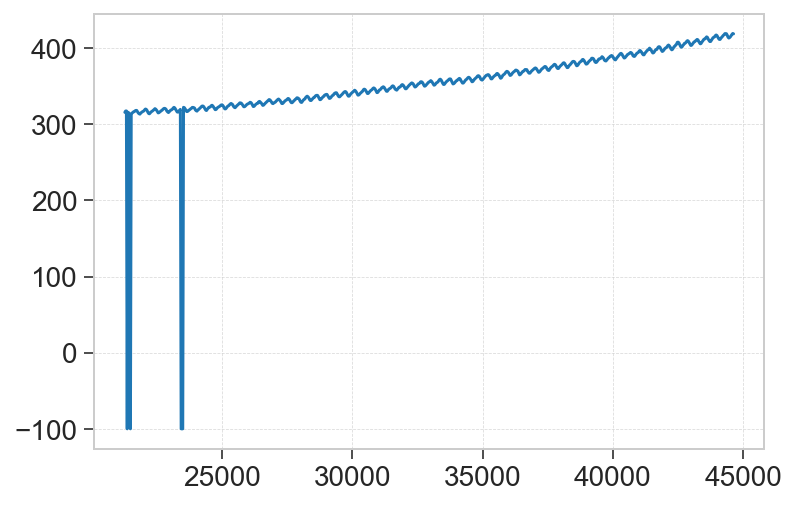

In [4]:
plt.plot(co2_data['Date'], co2_data['CO2'])

We can see that missing data is indicated with -99.99 values, which makes graphing (and trendlines) difficult.

We can drop the data (e.g., selecting good data which isn't -99.99).

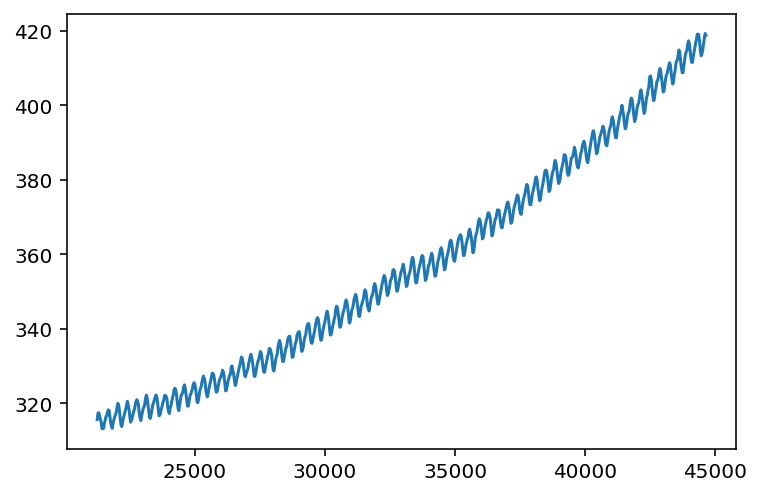

In [6]:
good_data = co2_data[co2_data.CO2 != -99.99]

plt.plot(good_data['Date'], good_data['CO2'])

In [7]:
import scipy.optimize
import scipy.stats

dates = good_data['Date']
co2 = good_data['CO2']

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(dates, co2)
print(slope, intercept, r_value**2)

0.00440579149971293 211.82453144247515 0.97677775745384


Text(0, 0.5, 'CO2 (ppm)')

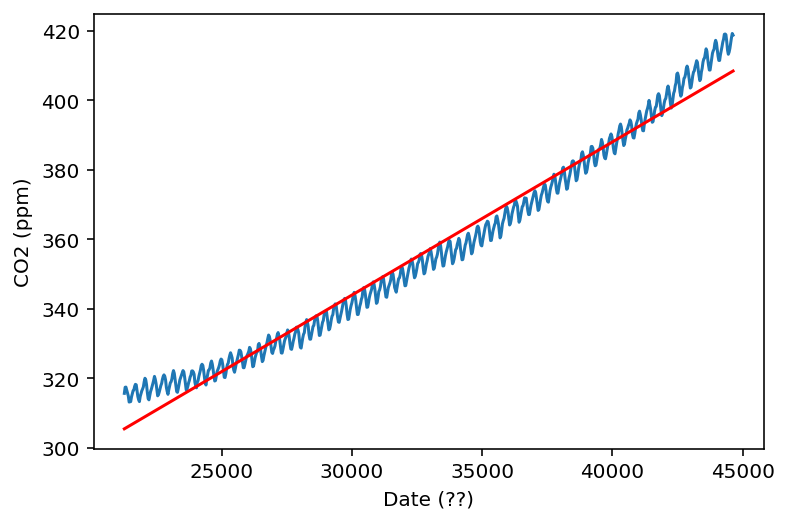

In [8]:
plt.plot(dates, co2)
plt.plot(dates, slope*dates + intercept, color='red')
plt.xlabel('Date (??)')
plt.ylabel('CO2 (ppm)')

It's **definitely** not linear. (Uh oh, kinda scary!)

Even though the $R^2$ is high (0.98), it's not a good fit. We can't use $R^2$ to tell us if we have a good fit honestly. It tells us how much the variation in Y is explained by variation in X - but that's true here because we have a large range in both variables.

It's still not linear.

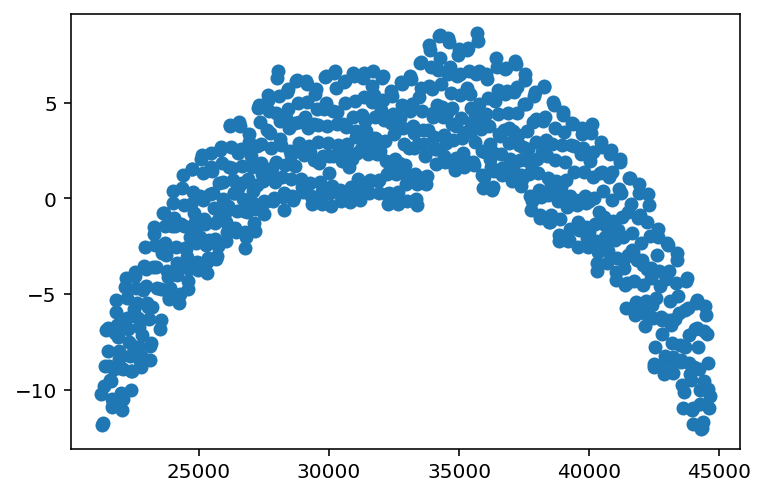

In [9]:
fitted = slope*dates + intercept
residuals = fitted - co2

plt.scatter(dates, residuals)
plt.show()

So this residual plot shows there's a problem with linearity - the residuals depend on date.

With data that's kinda close to linear, this is a useful plot in my experience. It's sometimes hard to spot not-quite-linear data from the fit, but more obvious in the residual plot.

In [10]:
# Define the fit function - notice, no intercept, so that's forced through zero
def quadratic_fit(x, a, b, c):
    y = a + b*x + c*x**2
    return y

parameters, covariance = scipy.optimize.curve_fit(quadratic_fit, dates, co2)
# this prints all the parameters in the array
print(*parameters)

314.30241592106785 -0.0020751217868729653 9.820810970720174e-08


The slope and quadratic terms may seem small, but the x-axis is an Excel date/time so it's days since January 1st 1900.

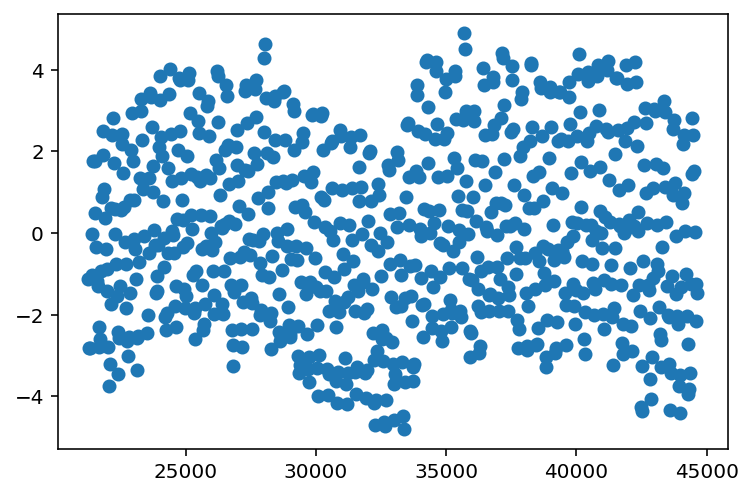

In [11]:
a = parameters[0]
b = parameters[1]
c = parameters[2]

fitted = a + b*dates + c*dates**2
residuals = fitted - co2

plt.scatter(dates, residuals)
plt.show()

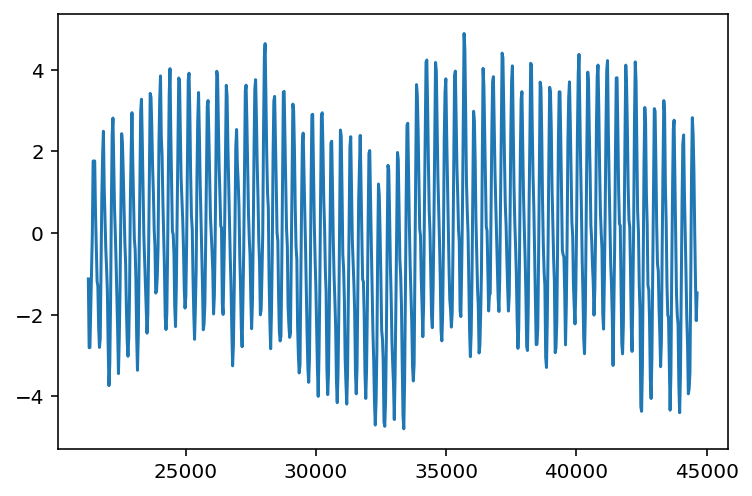

In [12]:
plt.plot(dates, residuals)

This *definitely* has structure to it - there's a seasonal variation to $\mathrm{CO_2}$ concentrations, so there's already a seasonally-corrected column.

In [13]:
dates = good_data['Date']
co2 = good_data['Seasonal CO2']

parameters, covariance = scipy.optimize.curve_fit(quadratic_fit, dates, co2)
# this prints all the parameters in the array
print(*parameters)

314.23422590411076 -0.0020721909461545508 9.818349449103146e-08


Note that the parameters are essentially identical.

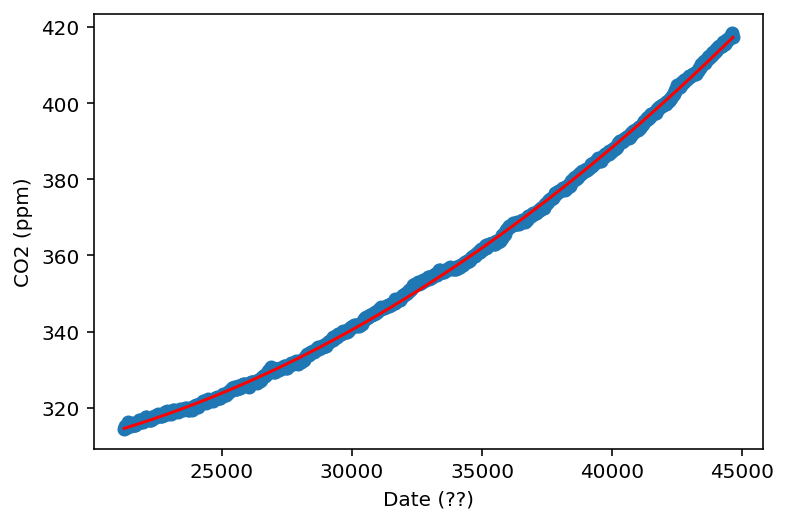

In [14]:
a = parameters[0]
b = parameters[1]
c = parameters[2]

fitted = a + b*dates + c*dates**2

plt.scatter(dates, co2)
plt.plot(dates, fitted, color='red')
plt.xlabel('Date (??)')
plt.ylabel('CO2 (ppm)')
plt.show()

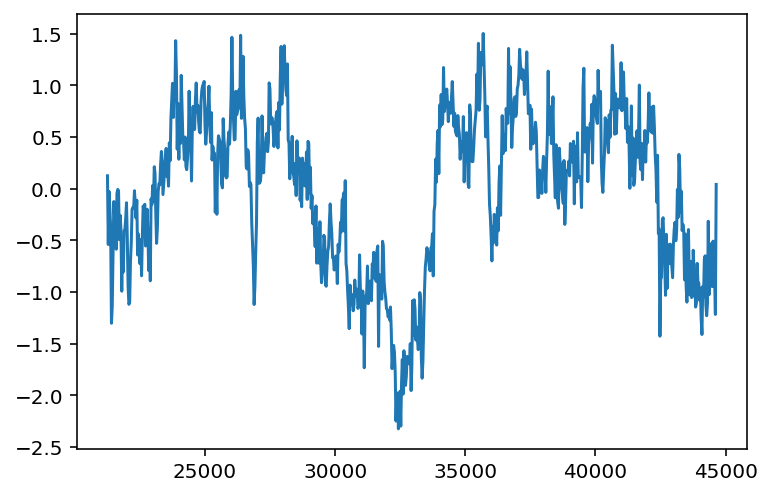

In [15]:
residuals = fitted - co2

plt.plot(dates, residuals)
plt.show()

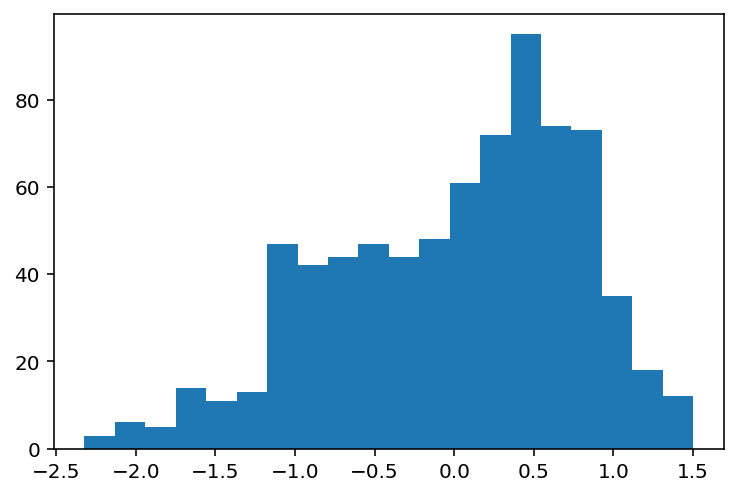

In [16]:
plt.hist(residuals, bins=20)
plt.show()

Assumption checklist:
- Linearity - this wasn't linear, but we found a good fit (quadratic)
- Independence - this is a time-series data, and the residuals show some structure, but maybe okay?
- Homoscedasticity - looks good from plotting the residuals
- Normality - the histogram looks.. eh? not great, not bad.. maybe?

Now if we can just transform those dates..

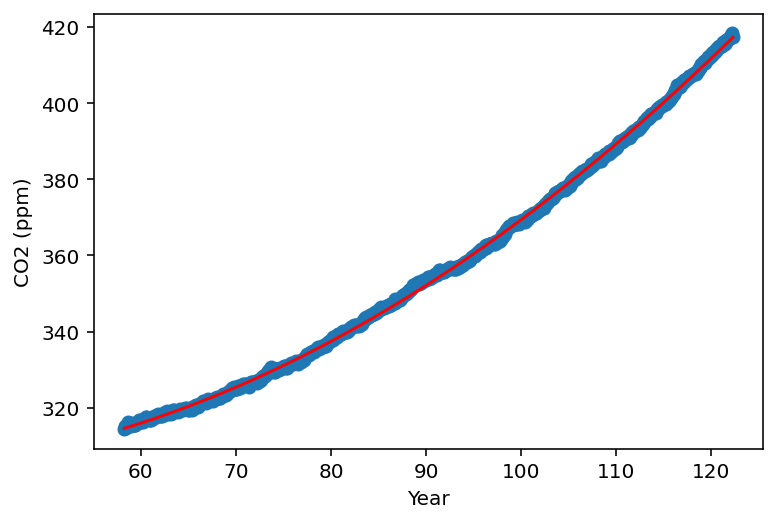

In [17]:
plt.scatter(dates / 365, co2)
plt.plot(dates / 365, fitted, color='red')
plt.xlabel('Year')
plt.ylabel('CO2 (ppm)')
plt.show()

I could clean up the x-axis a little more, but it's probably fine for now.

The critical question is more "can we change the shape of this curve?"

### Tips Data

This is a somewhat famous data set:
Bryant, P. G. and Smith, M (1995) *Practical Data Analysis: Case Studies in Business Statistics.* Homewood, IL: Richard D. Irwin Publishing

Each tip recorded at a restaurant over 244 bills.

In [19]:
tips_data = pd.read_csv('./data/tips.csv')
tips_data.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [20]:
tips_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Let's see how the tip scales with the total bill.

Text(0, 0.5, 'Tip ($)')

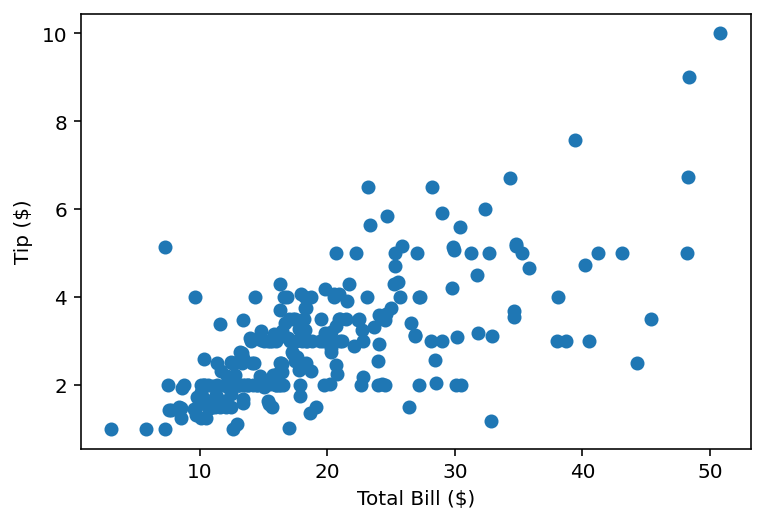

In [21]:
plt.scatter(tips_data.total_bill, tips_data.tip)
plt.xlabel('Total Bill ($)')
plt.ylabel('Tip ($)')

This is a classic case of heteroscedastic errors - much larger variation with big bills than with small bills.

<AxesSubplot: xlabel='day', ylabel='tip'>

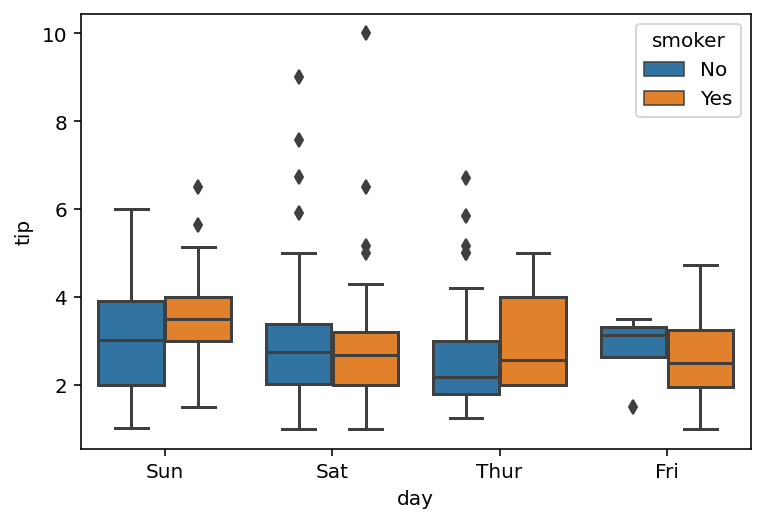

In [22]:
# seaborn is a Python package on top of matplotlib - it makes some plots much easier
#    https://seaborn.pydata.org/examples/index.html
import seaborn as sns

# Draw a nested boxplot to show tips by day
sns.boxplot(x="day", y="tip", hue="smoker", data=tips_data)

<AxesSubplot: xlabel='day', ylabel='tip'>

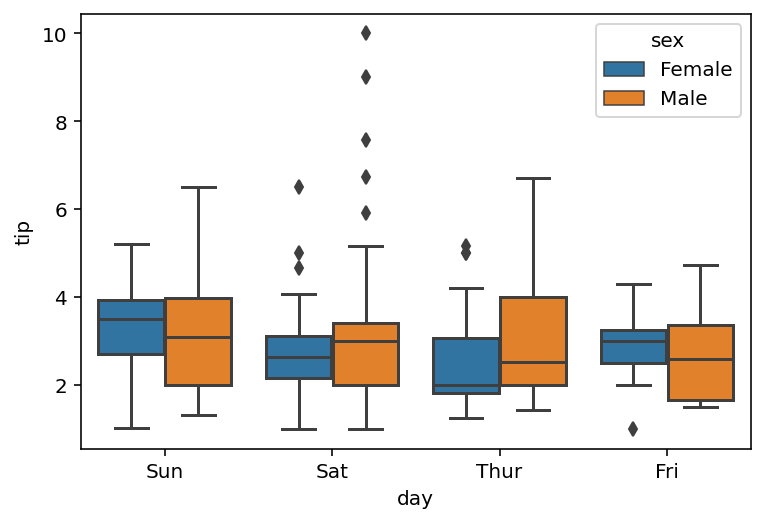

In [23]:
sns.boxplot(x="day", y="tip", hue="sex", data=tips_data)

Notice the outliers in the box plots. Not sure how much data there is, but the median tip from a smoker on Sunday...

The catch, though, is that we *know* tips are related to total bill. Most people tip around 15%.

So let's *transform* the data and see if we can minimize the heteroscedastic errors.

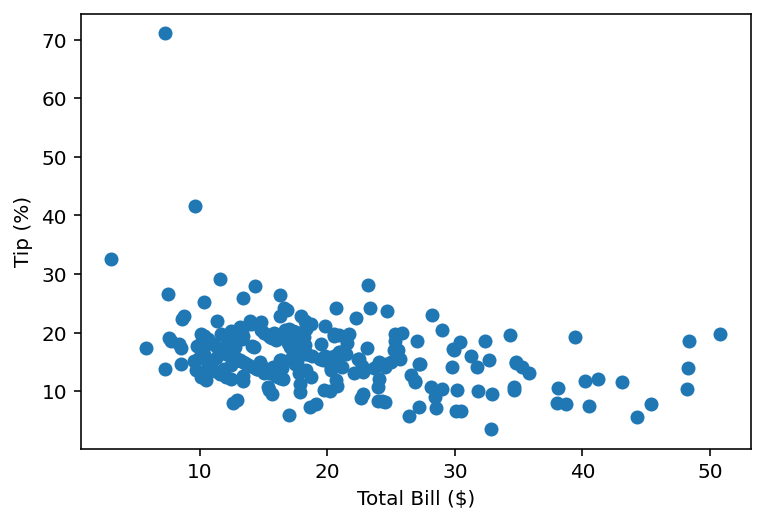

In [24]:
# I don't need to do this, but it saves me some typing
tips = tips_data.tip
total_bill = tips_data.total_bill

percent = tips / total_bill

plt.scatter(total_bill, percent * 100)
plt.xlabel('Total Bill ($)')
plt.ylabel('Tip (%)')
plt.show()

Woah, that's a nice tip! Let's analyze the cases where the tip is under 30% (i.e., the usual cases)

In [25]:
clean = tips_data[percent < 0.3]

percent = clean['tip'] / clean['total_bill']
print(percent)

0      0.059447
1      0.160542
2      0.166587
3      0.139780
4      0.146808
         ...   
239    0.203927
240    0.073584
241    0.088222
242    0.098204
243    0.159744
Length: 241, dtype: float64


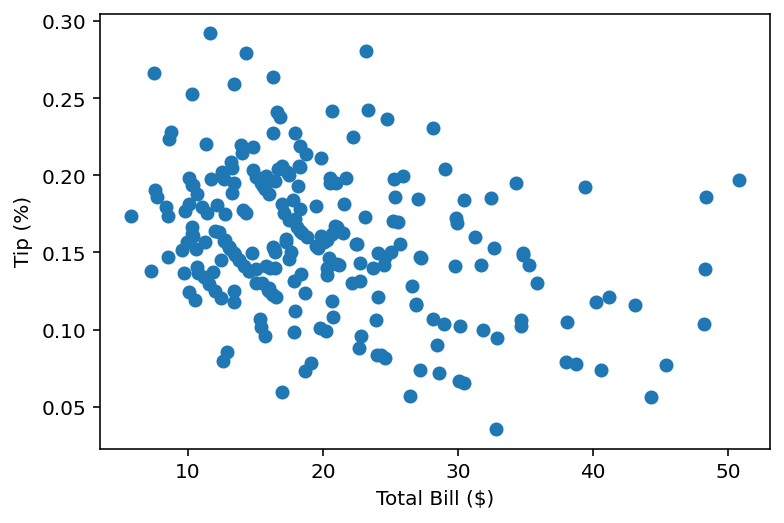

In [26]:
plt.scatter(clean['total_bill'], percent)
plt.xlabel('Total Bill ($)')
plt.ylabel('Tip (%)')
plt.show()

It's safe to say that smaller restaurant bills get higher tips.. and some people are really, really bad tippers in this data set. I mean 5% tip? That's horrible!

It's still not linear.

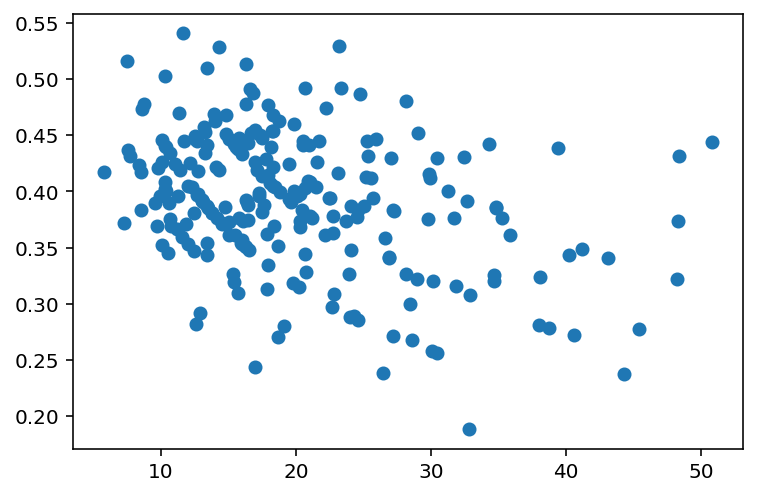

In [27]:
plt.scatter(clean['total_bill'], np.sqrt(percent))

You can feel free to play with the data more... transforming the X or Y values to get a better fit:

In [28]:
total = clean['total_bill']
sq_percent = np.sqrt(percent)

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(total, sq_percent)
print(slope, intercept, r_value**2)

-0.002371878152312461 0.4387040245002104 0.12156046552930629


-------
This notebook is from Prof. Geoffrey Hutchison, University of Pittsburgh
https://github.com/ghutchis/chem1000

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a>